## Jobsheet 7

*   Nama : Muhammad Ainur Riziq
*   Absen : 19
*   Kelas : TI 3E

<br>

### Praktikum 1
- Kmeans

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Kode ini memuat library, membaca data "Iris.csv" dengan `pd.read_csv()`, dan menampilkan 5 baris pertama dengan `df.head()`.

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Kode ini menyeleksi fitur dari data. Variabel `X` mengambil semua kolom kecuali yang pertama dan terakhir, sedangkan `y` mengambil kolom terakhir sebagai label.

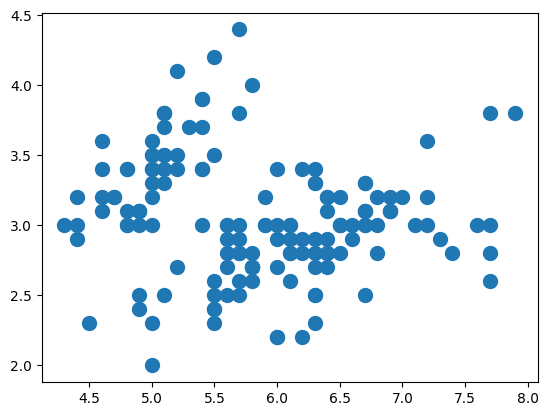

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Kode ini membuat scatter plot menggunakan dua kolom pertama dari variabel `X`, dengan ukuran titik (`s`) sebesar 100.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Kode ini membuat model KMeans dengan 2 kluster (`n_clusters=2`) tanpa asumsi jumlah label. Model diinisiasi dengan `KMeans()`, lalu data fitur `X` diproses menggunakan `fit_predict()` untuk melakukan clustering dan memprediksi kluster tiap data, hasilnya disimpan di `y_kmeans`.

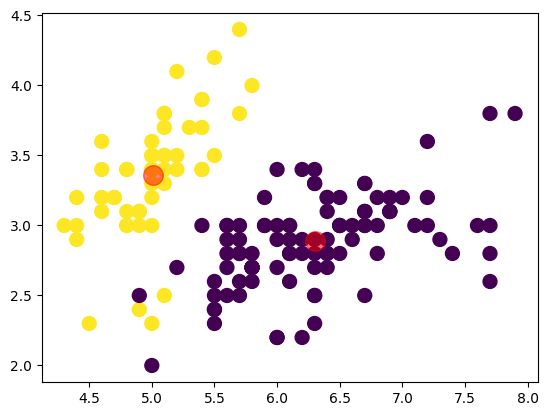

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Kode ini membuat scatter plot hasil clustering berdasarkan Sepal Length dan Sepal Width. Titik-titik data diberi warna sesuai kluster yang diprediksi (`c=y_kmeans`). Kemudian, centroid dari tiap kluster dihitung dengan `cluster_centers_` dan ditampilkan sebagai titik merah dengan ukuran 200 dan transparansi 50% (`alpha=0.5`).

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


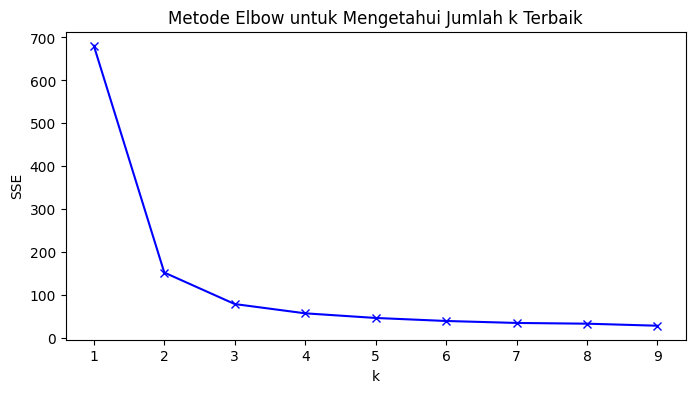

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Kode ini mengimplementasikan metode Elbow untuk menentukan jumlah kluster terbaik. Nilai SSE (Sum of Squared Errors) dihitung untuk berbagai nilai k dari 1 hingga 9, menggunakan loop. Setiap model KMeans dilatih pada data `X`, dan nilai SSE disimpan di daftar `sse`. Grafik hubungan antara jumlah kluster (`k`) dan SSE diplot untuk membantu mengidentifikasi titik elbow, yang menunjukkan k terbaik.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.34839539170508
k=5; SSE=46.535582051282034
k=6; SSE=39.51795077185665
k=7; SSE=34.926495183585324
k=8; SSE=33.21889210950081
k=9; SSE=28.468322179282705


Kode ini mencetak nilai SSE untuk setiap nilai k. Dengan `enumerate()`, setiap nilai SSE dalam daftar `sse` di-loop, dan k beserta nilai SSE dicetak, dimulai dari k=1.

### Praktikum 2

Konsep K-Means untuk klasterisasi data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Kode ini mengimpor pustaka yang diperlukan untuk visualisasi data. `matplotlib.pyplot` digunakan untuk membuat grafik, `seaborn` (dengan `sns.set()` untuk mengatur gaya visual), dan `numpy` digunakan untuk operasi numerik.

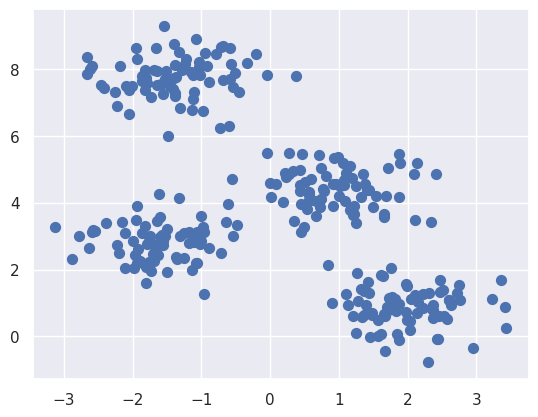

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Kode ini menghasilkan dataset sintetis menggunakan `make_blobs`, dengan 300 sampel yang tersebar di 4 kluster. Standar deviasi setiap kluster diatur ke 0.60, dan `random_state=0` digunakan untuk memastikan hasil yang konsisten. Dataset tersebut diplot menggunakan scatter plot, dengan ukuran titik sebesar 50.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Kode ini menginisiasi model KMeans dengan 4 kluster dan melatih model tersebut menggunakan dataset `X`. Setelah model dilatih, kluster yang diprediksi untuk setiap titik data disimpan dalam variabel `y_kmeans`.

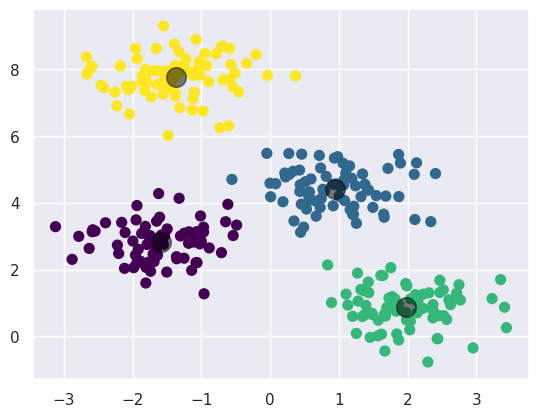

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Kode ini membuat scatter plot dari dataset `X` dengan titik-titik diberi warna sesuai kluster yang diprediksi (`c=y_kmeans`) menggunakan palet warna 'viridis'. Centroid dari kluster, yang dihitung dengan `cluster_centers_`, ditampilkan sebagai titik hitam dengan ukuran 200 dan transparansi 50% (`alpha=0.5`).

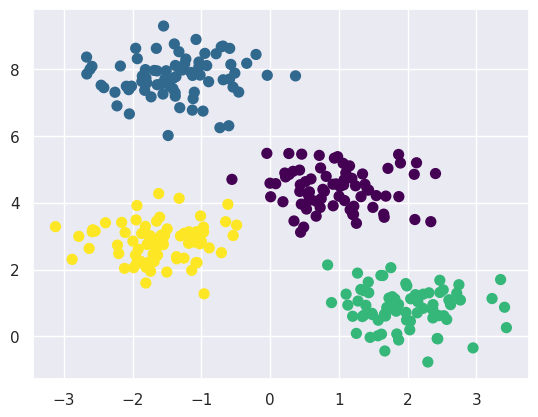

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini mendefinisikan fungsi `find_clusters` untuk clustering manual dengan memilih centroid awal secara acak, melabeli titik data berdasarkan jarak terdekat, dan memperbarui centroid hingga konvergensi. Hasil clustering untuk 4 kluster kemudian diplot dengan warna sesuai label yang dihasilkan.

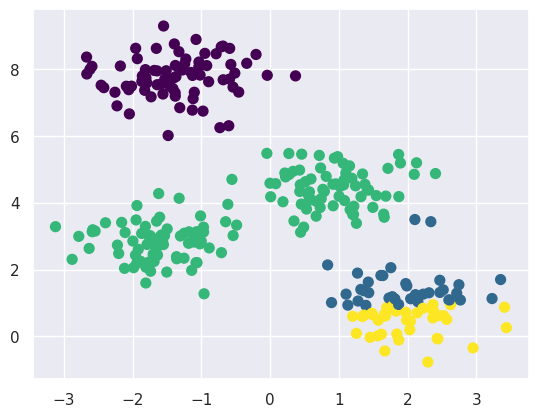

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini menjalankan fungsi `find_clusters` dengan 4 kluster dan seed acak `rseed=0`. Hasil clustering diplot, dengan titik-titik yang diberi warna sesuai label yang dihasilkan.

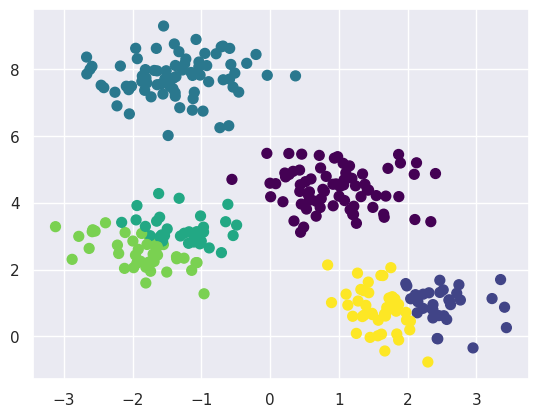

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kode ini mengaplikasikan model KMeans dengan 6 kluster pada dataset `X`, menggunakan `random_state=0` untuk konsistensi hasil. Titik-titik data diplot dengan warna sesuai label kluster yang diprediksi, menggunakan palet warna 'viridis'.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Kode ini menghasilkan dataset sintetis berbentuk bulan sabit menggunakan `make_moons`, dengan 200 sampel dan sedikit noise (0.05) untuk menambah variasi. Hasilnya disimpan dalam variabel `X` untuk fitur dan `y` untuk label sebenarnya.

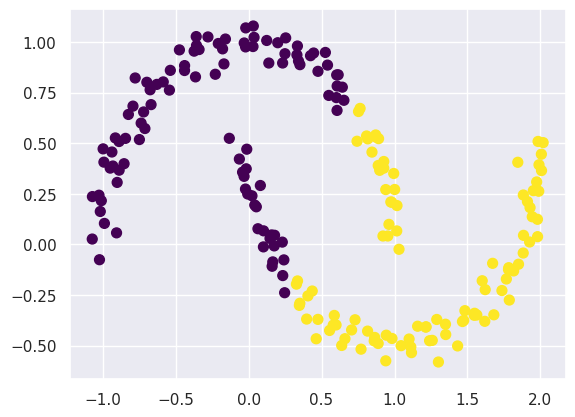

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini menerapkan model KMeans dengan 2 kluster pada dataset `X` yang berbentuk bulan sabit, menggunakan `random_state=0` untuk hasil yang konsisten. Titik-titik data diplot dengan warna sesuai label kluster yang diprediksi, menggunakan palet warna 'viridis'.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


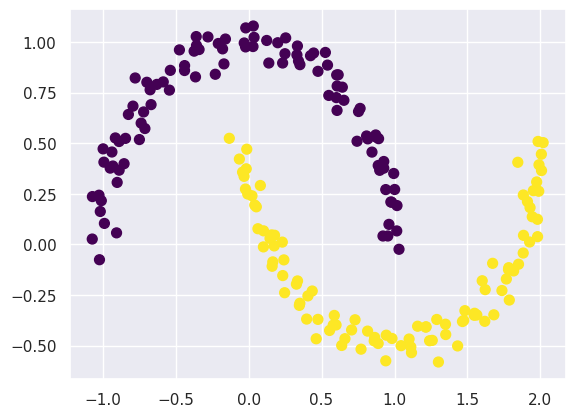

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kode ini menerapkan *Spectral Clustering* pada data `X` dengan 2 kluster, menggunakan *nearest_neighbors* sebagai afinitas dan *kmeans* untuk penugasan label. Hasil clustering diplot dengan warna sesuai label kluster yang dihasilkan.



#### Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Kode ini memuat dataset *digits* menggunakan `load_digits()` dan menampilkan bentuk data fitur dengan `digits.data.shape`, yang menunjukkan jumlah sampel dan jumlah fitur dalam dataset.

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Kode ini menerapkan KMeans dengan 10 kluster pada dataset *digits* dan menyimpan label kluster yang diprediksi dalam variabel `clusters`. Bentuk centroid kluster ditampilkan dengan `kmeans.cluster_centers_.shape`.

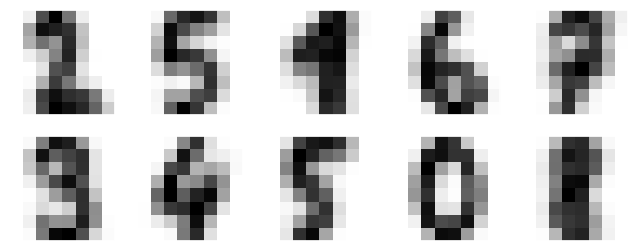

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Kode ini membuat subplot dengan 2 baris dan 5 kolom untuk menampilkan centroid kluster dari KMeans. Centroid dirubah bentuknya menjadi 10 gambar berukuran 8x8. Setiap gambar ditampilkan tanpa sumbu, menggunakan palet warna biner (`cmap=plt.cm.binary`), dan disusun dalam subplot menggunakan `imshow()`.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Kode ini membuat array `labels` untuk menyusun label baru berdasarkan mode dari label asli `digits.target` untuk setiap kluster, dengan menggunakan mask untuk memilih data yang sesuai.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Kode ini menghitung dan mengembalikan akurasi model dengan membandingkan label asli `digits.target` dengan label yang baru dibuat (`labels`) menggunakan fungsi `accuracy_score`.

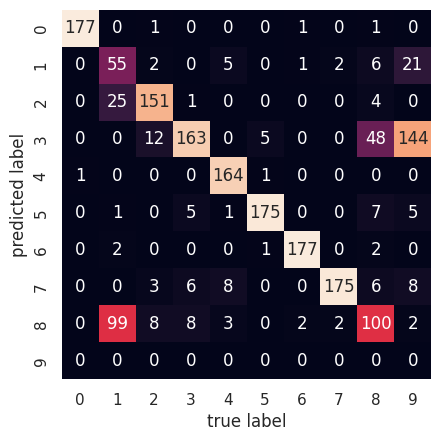

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Kode ini menghasilkan confusion matriks dengan membandingkan label asli `digits.target` dan label baru (`labels`). Matriks tersebut kemudian divisualisasikan menggunakan heatmap dari Seaborn, dengan anotasi angka di setiap sel, tanpa color bar. Sumbu x dan y diberi label sesuai dengan nama target digit.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Kode ini mereduksi dimensi dataset *digits* menggunakan *t-SNE* dan menerapkan KMeans dengan 10 kluster. Label baru dihitung berdasarkan mode dari label asli untuk setiap kluster, lalu akurasi model dihitung dengan membandingkan label asli `digits.target` dan label yang baru menggunakan `accuracy_score`.

#### Studi Kasus 2: Kompresi Citra


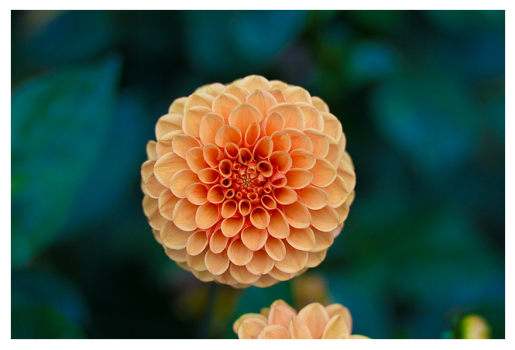

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

Kode ini memuat gambar sampel *flower.jpg* menggunakan `load_sample_image()` dan menampilkan gambar tersebut dalam plot tanpa sumbu (xticks dan yticks) menggunakan `imshow()`.

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Kode ini menormalkan gambar `flower` dan merubahnya menjadi array 2D, di mana setiap baris mewakili piksel dan kolom mewakili saluran warna. Bentuk data baru ditampilkan dengan `data.shape`.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Kode ini mendefinisikan fungsi `plot_pixels` untuk memvisualisasikan distribusi warna dari dataset. Fungsi ini memilih subset acak dari data, memisahkan nilai warna merah, hijau, dan biru, lalu membuat dua plot scatter untuk menunjukkan hubungan antara saluran merah-hijau dan merah-biru, lengkap dengan label sumbu dan judul.

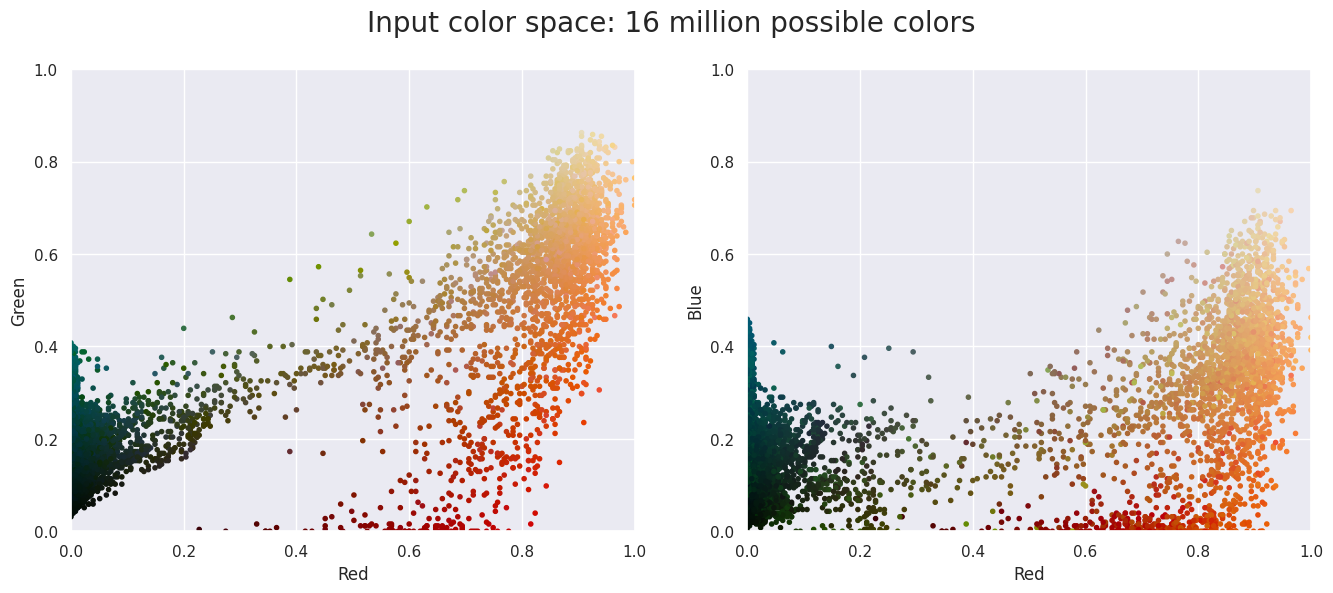

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

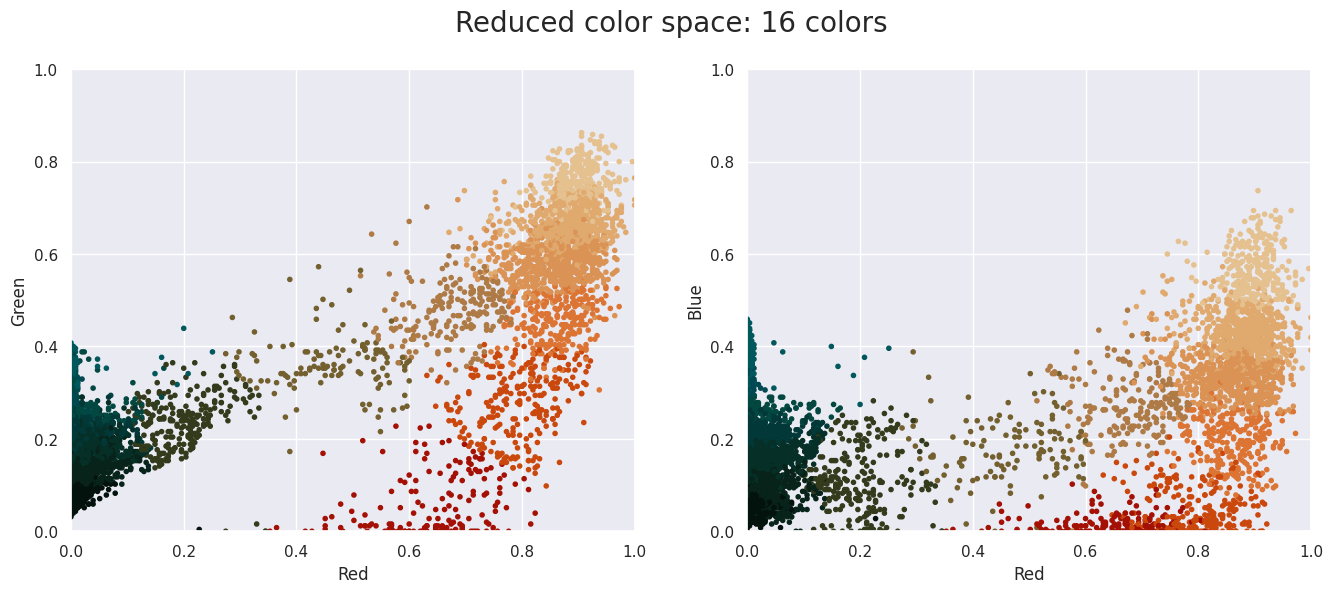

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Kode ini mengabaikan peringatan dari NumPy, kemudian menggunakan *MiniBatchKMeans* untuk mengelompokkan warna dalam data menjadi 16 warna. Setelah itu, fungsi `plot_pixels` digunakan untuk memvisualisasikan distribusi warna yang direduksi dengan judul "Reduced color space: 16 colors".

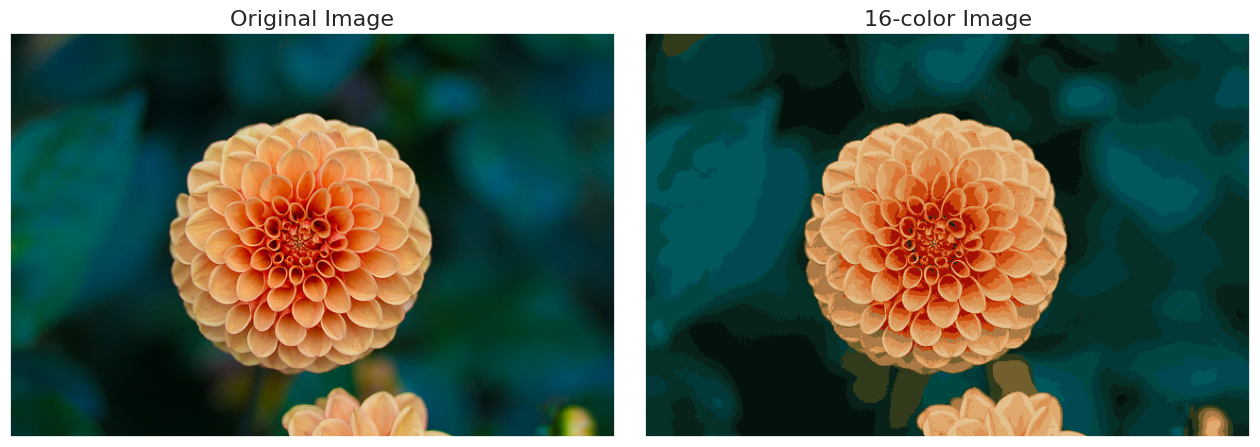

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

Kode ini mengubah warna yang direduksi (`new_colors`) kembali ke bentuk gambar (`flower_recolored`) dan menampilkan dua subplot: gambar asli dan gambar dengan 16 warna yang direduksi. Sumbu disembunyikan, dan setiap subplot diberi judul yang sesuai.

### Praktikum 3

Self-optimizing Map (SOM)


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=984807e71e3ae072cefb8effdaade1e7239fb837221ab2b6bed1d097982e463e
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Kode ini mengimpor *MiniSom* untuk Self-Organizing Maps, serta NumPy dan Matplotlib untuk komputasi dan visualisasi, serta *datasets* dari *sklearn* untuk mengakses dataset.

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Gunakan dataset Iris sebagai contoh



In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.



In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM



In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Inisialisasi bobot SOM secara acak.



In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Melatih SOM dengan data menggunakan metode train_random.



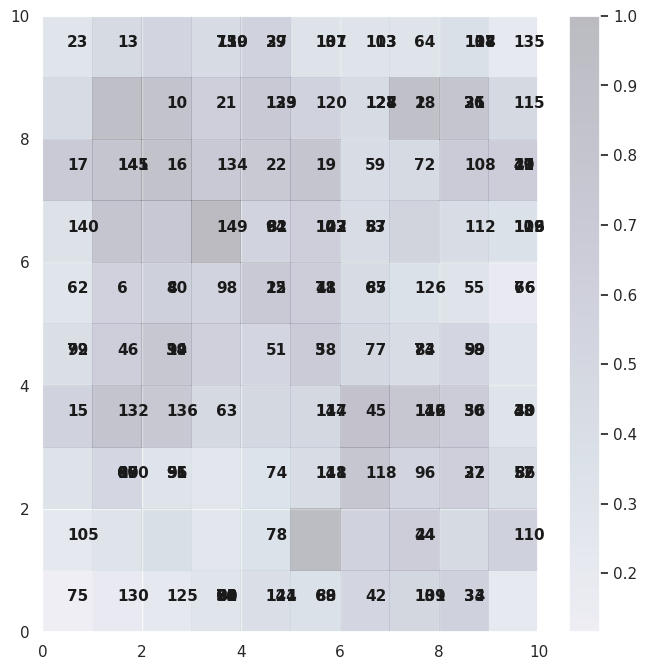

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

Kode ini memvisualisasikan hasil *Self-Organizing Map* (SOM) dengan menampilkan indeks data pada neuron pemenang dan menggambar peta jarak neuron menggunakan `pcolor`. Palet warna *bone_r* dan transparansi ditambahkan, serta colorbar untuk skala nilai jarak, sebelum menampilkan hasil dengan `plt.show()`.

#### Praktikum 4

Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.



In [11]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=63c8a7cbabdf3d1ab52a044455805d561be9c3686ab3323d14f897517c158de6
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

Kode ini mendefinisikan fungsi `initialize_weights` untuk menginisialisasi bobot *Self-Organizing Map* (SOM) dengan nilai acak, berdasarkan bentuk input dan output yang diberikan.

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

Kode ini mendefinisikan fungsi `calculate_distance` untuk menghitung jarak Euclidean antara vektor input dan bobot *Self-Organizing Map* (SOM), mengembalikan hasil perhitungan jarak sepanjang dimensi fitur.

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

Kode ini mendefinisikan fungsi `find_winner_unit_in_image` yang mencari unit pemenang di *Self-Organizing Map* (SOM) dengan menghitung jarak vektor input terhadap bobot, dan mengembalikan indeks unit dengan jarak terdekat.

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

Kode ini mendefinisikan fungsi `update_weights` untuk memperbarui bobot *Self-Organizing Map* (SOM) dengan menghitung jarak unit pemenang dan unit lainnya. Bobot diperbarui berdasarkan laju pembelajaran dan pengaruh yang ditentukan oleh radius tetangga.

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

Kode ini mendefinisikan fungsi `train_som` untuk melatih *Self-Organizing Map* (SOM) dengan memproses citra selama sejumlah epoch. Fungsi ini menginisialisasi bobot, memperbarui parameter pembelajaran dan radius tetangga, lalu melakukan iterasi pada setiap piksel untuk menemukan unit pemenang dan memperbarui bobot. Bobot akhir yang dilatih dikembalikan setelah selesai.

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "data/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

Kode ini melatih *Self-Organizing Map* (SOM) pada citra `Lenna` selama 100 epoch dengan laju pembelajaran awal 0,1 dan radius tetangga awal 5, menyimpan bobot yang terlatih dalam `trained_weights`.


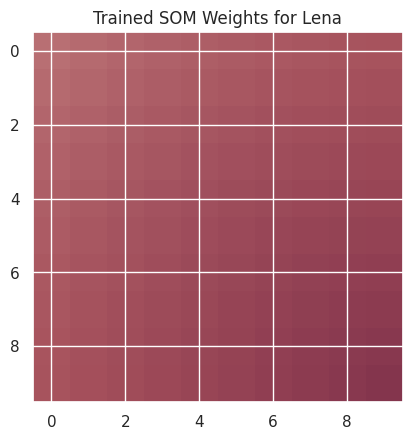

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

### Tugas Praktikum
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.


In [3]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


k = 1, SSE = 399.99999999999994
k = 2, SSE = 273.66888662642003
k = 3, SSE = 157.70400815035939
k = 4, SSE = 109.22822707921345
k = 5, SSE = 65.56840815571681
k = 6, SSE = 60.132874871934206
k = 7, SSE = 49.668244837367965
k = 8, SSE = 37.31912287833882
k = 9, SSE = 32.495081199100916
k = 10, SSE = 30.05932269404222


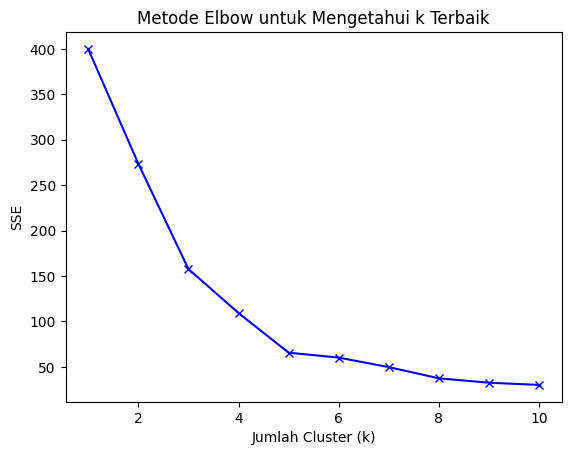

In [7]:
# Seleksi fitur 'Annual Income (k$)' dan 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementasi Metode Elbow untuk Mengetahui k Terbaik
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    print(f'k = {k}, SSE = {kmeans.inertia_}')

# Plot Metode Elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Mengetahui k Terbaik')
plt.show()

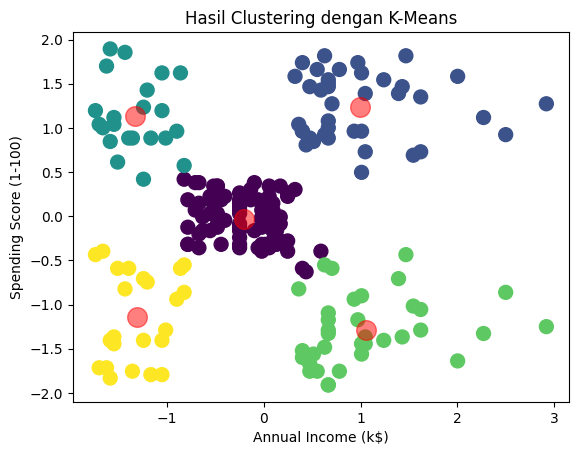

In [6]:
# Buat model K-Means dengan jumlah cluster optimal
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans_final.fit_predict(X_scaled)

# Plot hasil clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


4. Buatlah  implementasi model SOM untuk segmentasi citra lain

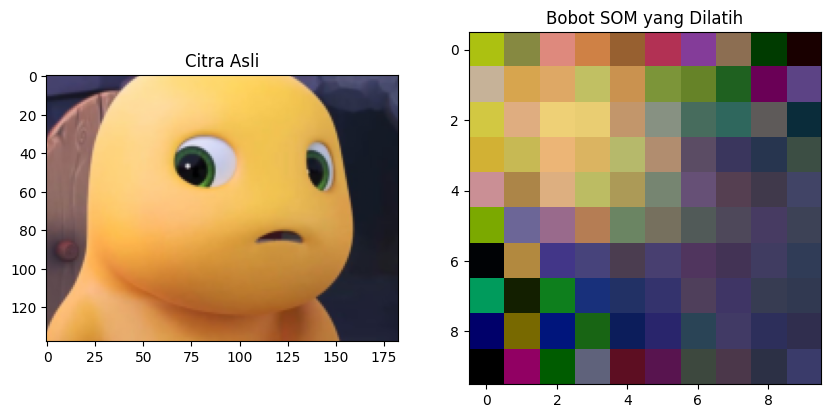

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from minisom import MiniSom

# Membaca dan menormalkan citra
photo = io.imread('data/dino.jpg') / 255.0

# Mengubah ukuran citra
image_resized = resize(photo, (photo.shape[0] // 4, photo.shape[1] // 4), anti_aliasing=True)

# Mengubah citra ke bentuk 2D untuk pelatihan SOM
shape = image_resized.shape
data = image_resized.reshape(-1, 3)  # Mengambil RGB

# Mengatur parameter SOM
num_epochs = 100
som_size = 10  # Ukuran grid SOM
initial_learning_rate = 0.1
initial_neighborhood_radius = 5

# Membuat dan melatih SOM
som = MiniSom(som_size, som_size, 3, sigma=initial_neighborhood_radius, learning_rate=initial_learning_rate)
som.train(data, num_epochs)

# Mengambil bobot dari SOM
weights = som.get_weights()

# Mengubah bobot menjadi citra untuk visualisasi
weights_reshaped = weights.reshape(som_size, som_size, 3)

# Visualisasi bobot SOM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(weights_reshaped)
plt.title('Bobot SOM yang Dilatih')

plt.show()